In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [2]:
df1 = pd.read_csv("dogecoin_data_uptodate.csv")
df = df1.reset_index(drop = True)

In [3]:
rawData = df[['Open*']]
dataset = rawData.values
dataset = dataset.astype('float32')
for i in range(int(len(dataset)/2)):
    dataset[i], dataset[len(dataset)-1-i] = dataset[len(dataset)-1-i], dataset[i]

In [6]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [9]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
trainX = ss_x.fit_transform(trainX)
testX = ss_x.fit_transform(testX)
ss_y = StandardScaler()
trainY = ss_y.fit_transform(trainY.reshape(-1, 1))
testY = ss_y.transform(testY.reshape(-1, 1))

# Models

In [12]:
n_folds = 6
model_br = BayesianRidge()
model_lr = LinearRegression()
model_etc = ElasticNet()
model_svr = SVR(kernel="linear")
model_gbr = GradientBoostingRegressor()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor(n_estimators=500)
model_et = ExtraTreesRegressor()

model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR', 'Decision Tree', 'Random Forest', 'Extra Tree']
model_dic = [model_br, model_lr, model_etc, model_svr, model_gbr, model_dt, model_rf, model_et]
cv_score_list = []
predict_y_list = []

In [13]:
for model in model_dic:
    scores = cross_val_score(model, trainX, trainY, cv=n_folds)
    cv_score_list.append(scores)
    predict_y_list.append(model.fit(trainX, trainY).predict(testX))

/Users/yuchenxing/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuchenxing/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuchenxing/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuchenxing/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/yuchenxing/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yuchenxing/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yuchenxing/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yuchenxing/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [14]:
n_samples, n_features = trainX.shape

In [15]:
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score] 
model_metrics_list = []
for i in range(8):
    tmp_list = []
    for m in model_metrics_name:
        tmp_score = m(testY, predict_y_list[i])
        tmp_list.append(tmp_score)
    model_metrics_list.append(tmp_list)

In [16]:
dfcv = pd.DataFrame(cv_score_list, index=model_names)
dfsc = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2']) 

In [17]:
print ('train samples: %d \t lookback: %d' % (n_samples, n_features))
print (80 * '-')  
print ('cross validation result on training dataset:')
print (dfcv)
print (80 * '-')
print ('regression metrics on test dataset:')
print (dfsc)
print (80 * '-')
print ('short name \t full name')
print ('ev \t\t explained_variance')
print ('mae \t\t mean_absolute_error')
print ('mse \t\t mean_squared_error')
print ('r2 \t\t r2')
print (80 * '-')

train samples: 1503 	 lookback: 10
--------------------------------------------------------------------------------
cross validation result on training dataset:
                         0         1         2         3         4         5
BayesianRidge     0.944876  0.961872  0.924270  0.797673  0.907252  0.934334
LinearRegression  0.944817  0.961822  0.924127  0.797650  0.906681  0.934409
ElasticNet       -0.754594  0.234955 -6.293138  0.478079  0.301711  0.144167
SVR               0.942371  0.955787  0.881408  0.795317  0.899059  0.926153
GBR              -0.478478  0.954387  0.910769  0.801308  0.907718  0.926668
Decision Tree    -0.660935  0.854877  0.530670  0.672471  0.813123  0.923070
Random Forest    -0.288358  0.941485  0.849351  0.780542  0.902923  0.931439
Extra Tree       -0.223349  0.923910  0.702346  0.778427  0.876948  0.908281
--------------------------------------------------------------------------------
regression metrics on test dataset:
                        ev   

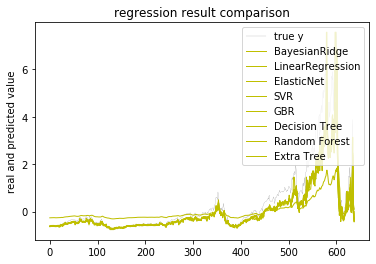

In [18]:
plt.figure()
plt.plot(np.arange(testX.shape[0]), testY, color='k', label='true y', linewidth=0.1)
color_list = ['r', 'b', 'g', 'y', 'c']
# linestyle_list = ['-', '.', 'o', 'v', '*']
for i, pre_y in enumerate(predict_y_list):
    plt.plot(np.arange(testX.shape[0]), predict_y_list[i], color_list[3], label=model_names[i], linewidth=1)
plt.title('regression result comparison')
plt.legend(loc='upper right')
plt.ylabel('real and predicted value')
plt.show()